# T1-1. 이상치를 찾아라(IQR활용) 

In [1]:
#데이터에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오
import pandas as pd

df=pd.read_csv('C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\Titanic.csv')
Q1= df['Fare'].quantile(.25)
Q3= df['Fare'].quantile(.75)
IQR= Q3-Q1
outlier1=Q1-IQR*1.5
outlier2=Q3+IQR*1.5
df=df.loc[(df['Fare']<outlier1) | (df['Fare']>outlier2)]  #다중 조건 적용(&(and), |(or))
sum(df['Gender']=='female')

70

# T1-2. 이상치를 찾아라(소수점 나이)

In [2]:
#주어진 데이터에서 이상치(소수점 나이)를 찾고 올림, 내림, 버림(절사)했을때 3가지 모두 이상치 'age' 평균을 구한 다음 모두 더하여 출력하시오
import pandas as pd
import numpy as np

df=pd.read_csv('C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\basic1.csv')
#print(df.head())
df=df[df['age']-np.floor(df['age']) != 0] #소수점 데이터 찾기
ceil_mean=np.ceil(df['age']).mean()
floor_mean=np.floor(df['age']).mean()
trunc_mean=np.trunc(df['age']).mean()
ans=ceil_mean+floor_mean+trunc_mean
print(ans)

69.5


# T1-3. 결측치 처리(map 활용)

In [3]:
#주어진 데이터에서 결측치가 80%이상 되는 컬럼은(변수는) 삭제하고, 80% 미만인 결측치가 있는 컬럼은 'city'별 중앙값으로 값을 대체하고 'f1'컬럼의 평균값을 출력하세요!
import pandas as pd
import numpy as np

df=pd.read_csv('C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\basic1.csv')
#print(df.head)
df.isnull().sum() # EDA - 결측값 확인 (f1:31, f3: 95)

# 80%이상 결측치 컬럼, 삭제
df.shape #(100, 8)
df.isnull().sum()/df.shape[0] # f1:31%, f3:95%
df=df.drop(['f3'], axis=1) #axis=1 : column, axis=0 : index

# 80%미만 결측치 컬럼, city별 중앙값으로 대체
pd.unique(df['city']) #array(['서울', '부산', '대구', '경기'], dtype=object)
seo=df[df['city']=='서울']
seo=seo['f1'].median()
bu=df[df['city']=='부산']
bu=bu['f1'].median()
dae=df[df['city']=='대구']
dae=dae['f1'].median()
gye=df[df['city']=='경기']
gye=gye['f1'].median()

df['f1']=df['f1'].fillna(df['city'].map({'서울':seo, '부산':bu, '대구':dae, '경기':gye})) #df.fillna(): 전체 column 결측치 대체

# f1 평균값 결과 출력
ans=df['f1'].mean()
print(ans)

65.52


# T1-4. 왜도와 첨도 구하기 (로그스케일)

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|██████████| 199k/199k [00:00<00:00, 3.50MB/s]


df_skew:1.8828757597682129, df_kurt:6.536281860064529
log_skew:0.12134661989685333, log_kurt:0.809519155707878
9.35


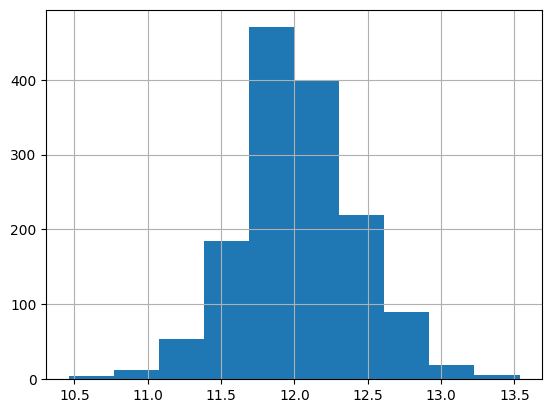

In [4]:
#주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df=pd.read_csv('C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\house-prices-advanced-regression-techniques\\train.csv')

# 'SalePrice'컬럼 왜도와 첨도계산 
df_skew=df['SalePrice'].skew()
df_kurt=df['SalePrice'].kurt()
print(f'df_skew:{df_skew}, df_kurt:{df_kurt}')
#df['SalePrice'].hist()#시각화=> 왼쪽으로 몰려 있음

# 'SalePrice'컬럼 로그변환
df['SalePrice'] = np.log1p(df['SalePrice']) #np.log()하면 데이터에 0이 있을 경우 -무한 값이 나옴.
df['SalePrice'].hist() #예측하려는 값이 한쪽으로 치우쳐져 있을 경우에는 꼭 로그변환을 통해 정규분포로 만들어줘야 함.

log_skew=df['SalePrice'].skew()
log_kurt=df['SalePrice'].kurt()
print(f'log_skew:{log_skew}, log_kurt:{log_kurt}')

ans=round(df_skew+df_kurt+log_skew+log_kurt, 2)
print(ans)

## T1-5. 조건에 맞는 데이터 표준편차 구하기

In [9]:
#주어진 데이터 중 basic1.csv에서 'f4'컬럼 값이 'ENFJ'와 'INFP'인 'f1'의 표준편차 차이를 절대값으로 구하시오
import pandas as pd
import numpy as np

df=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\basic1.csv")
df.head()
ENFJ_std=df[df['f4']=='ENFJ']['f1'].std()
INFP_std=df[df['f4']=='INFP']['f1'].std()
ans=np.abs(ENFJ_std-INFP_std)
print(ans)

5.859621525876811


## T1-6. 결측치 제거 및 그룹 합계

In [8]:
#주어진 데이터 중 basic1.csv에서 'f1'컬럼 결측 데이터를 제거하고, 'city'와 'f2'을 기준으로 묶어 합계를 구하고, 'city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오
import pandas as pd
import numpy as np

df=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\basic1.csv")
df=df.dropna(subset=['f1']) #결측치 제거 dropna(), subset으로 특정 column 선택
df=df.groupby(['city', 'f2']).sum() #city, f2별로 그룹화하여 합계 계산 ... 숫자형 데이터만 나오게 어떻게 하지..?
ans=df.loc['경기', 0]['f1'] #대괄호 기준 잘 모르겠음
print(ans)

833.0


## T1-7. 값 변경 및 2개 이상의 조건

In [16]:
#'f4'컬럼의 값이 'ESFJ'인 데이터를 'ISFJ'로 대체하고, 'city'가 '경기'이면서 'f4'가 'ISFJ'인 데이터 중 'age'컬럼의 최대값을 출력하시오!
import pandas as pd
import numpy as  np

df=pd.read_csv('C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\basic1.csv')
df[df['f4']=='ESFJ']
df['f4']=df['f4'].replace('ESFJ', 'ISFJ') #값 변경, inplace=True로 하면 원본 데이터에 반영 가능
ans=df[(df['f4']=='ISFJ') & (df['city']=='경기')]['age'].max()
print(ans)

90.0


# T1-8. 누적합 그리고 보간(결측치 처리)

In [13]:
#주어진 데이터 셋에서 'f2' 컬럼이 1인 조건에 해당하는 데이터의 'f1'컬럼 누적합을 계산한다. 이때 발생하는 누적합 결측치는 바로 뒤의 값을 채우고, 누적합의 평균값을 출력한다. (단, 결측치 바로 뒤의 값이 없으면 다음에 나오는 값을 채워넣는다)
import pandas as pd
import numpy as np

df=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\basic1.csv")
df1=df[df['f2']==1]
df1=df1['f1'].cumsum() #누적합 계산, 보통 매출이나 기간별 누적합 계산을 위해서 사용(일주일 매출, 월매출 등)
f=df1.bfill() #결측치 바로 뒤의 값으로 결측치 채우기->보간(이전 값으로 채우기->ffill(), 평균값으로 채우기 fillna(method=평균값))
ans=f.mean()
print(ans)

980.3783783783783


# T1-9. 수치형 변수 표준화

In [14]:
#주어진 데이터에서 'f5'컬럼을 표준화(Standardization (Z-score Normalization))하고 그 중앙값을 구하시오
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\basic1.csv")
scaler = StandardScaler() #모든값의 범위가 결정됨
df['f5']=scaler.fit_transform(df[['f5']]) #fit이랑 transform을 따로 해줄 수도 있음, (ex.f2를 기준으로 fit하고 f5를 fit기준으로 transform)
print(df['f5'].median())

0.260619629559015


# T1-11. min-max 기준 상하위 5%값

In [15]:
#모든 데이터를 -1과 1사이로 지정해줌.
#값 해석은 민맥스, 분석이 딱히 필요없을 때는 스탠다드스케일러 자주 사용

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler 

df=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\basic1.csv")
print(df.head())
scaler=MinMaxScaler()
df['f5']=scaler.fit_transform(df[['f5']]) #minmaxscaler는 0(?)과 1사이의 값으로 변환
print(df.head())
low=df['f5'].quantile(0.05) #하위 5%값
high=df['f5'].quantile(0.95) #상위 5%값
ans=low+high
print(ans) #정규화 시켜서 압축?하는 느낌

     id   age city    f1  f2   f3    f4         f5
0  id01   2.0   서울   NaN   0  NaN  ENFJ  91.297791
1  id02   9.0   서울  70.0   1  NaN  ENFJ  60.339826
2  id03  27.0   서울  61.0   1  NaN  ISTJ  17.252986
3  id04  75.0   서울   NaN   2  NaN  INFP  52.667078
4  id05  24.0   서울  85.0   2  NaN  ISFJ  29.269869
     id   age city    f1  f2   f3    f4        f5
0  id01   2.0   서울   NaN   0  NaN  ENFJ  0.919533
1  id02   9.0   서울  70.0   1  NaN  ENFJ  0.570252
2  id03  27.0   서울  61.0   1  NaN  ISTJ  0.084129
3  id04  75.0   서울   NaN   2  NaN  INFP  0.483685
4  id05  24.0   서울  85.0   2  NaN  ISFJ  0.219708
1.0248740983597389


# T1-12. 상위 10개, 하위 10개 차이

In [57]:
import pandas as pd
import numpy as np

df=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\Document\\covid-vaccination-vs-death_ratio.csv")
df['date']=pd.to_datetime(df['date'])
lat_date=df.loc[df.groupby('country')['date'].idxmax()] #최신 날짜 데이터만 추출
lat_date=lat_date.loc[lat_date['ratio'] <= 100]
lat_date.sort_values(by='ratio', inplace=True)

h=lat_date.head(10)
h_mean=h['ratio'].mean() 
t=lat_date.tail(10)
t_mean=t['ratio'].mean()
ans=h_mean-t_mean

print(round(ans, 1))


-88.4


# T1-13. 상관관계 구하기

0.49


<Axes: >

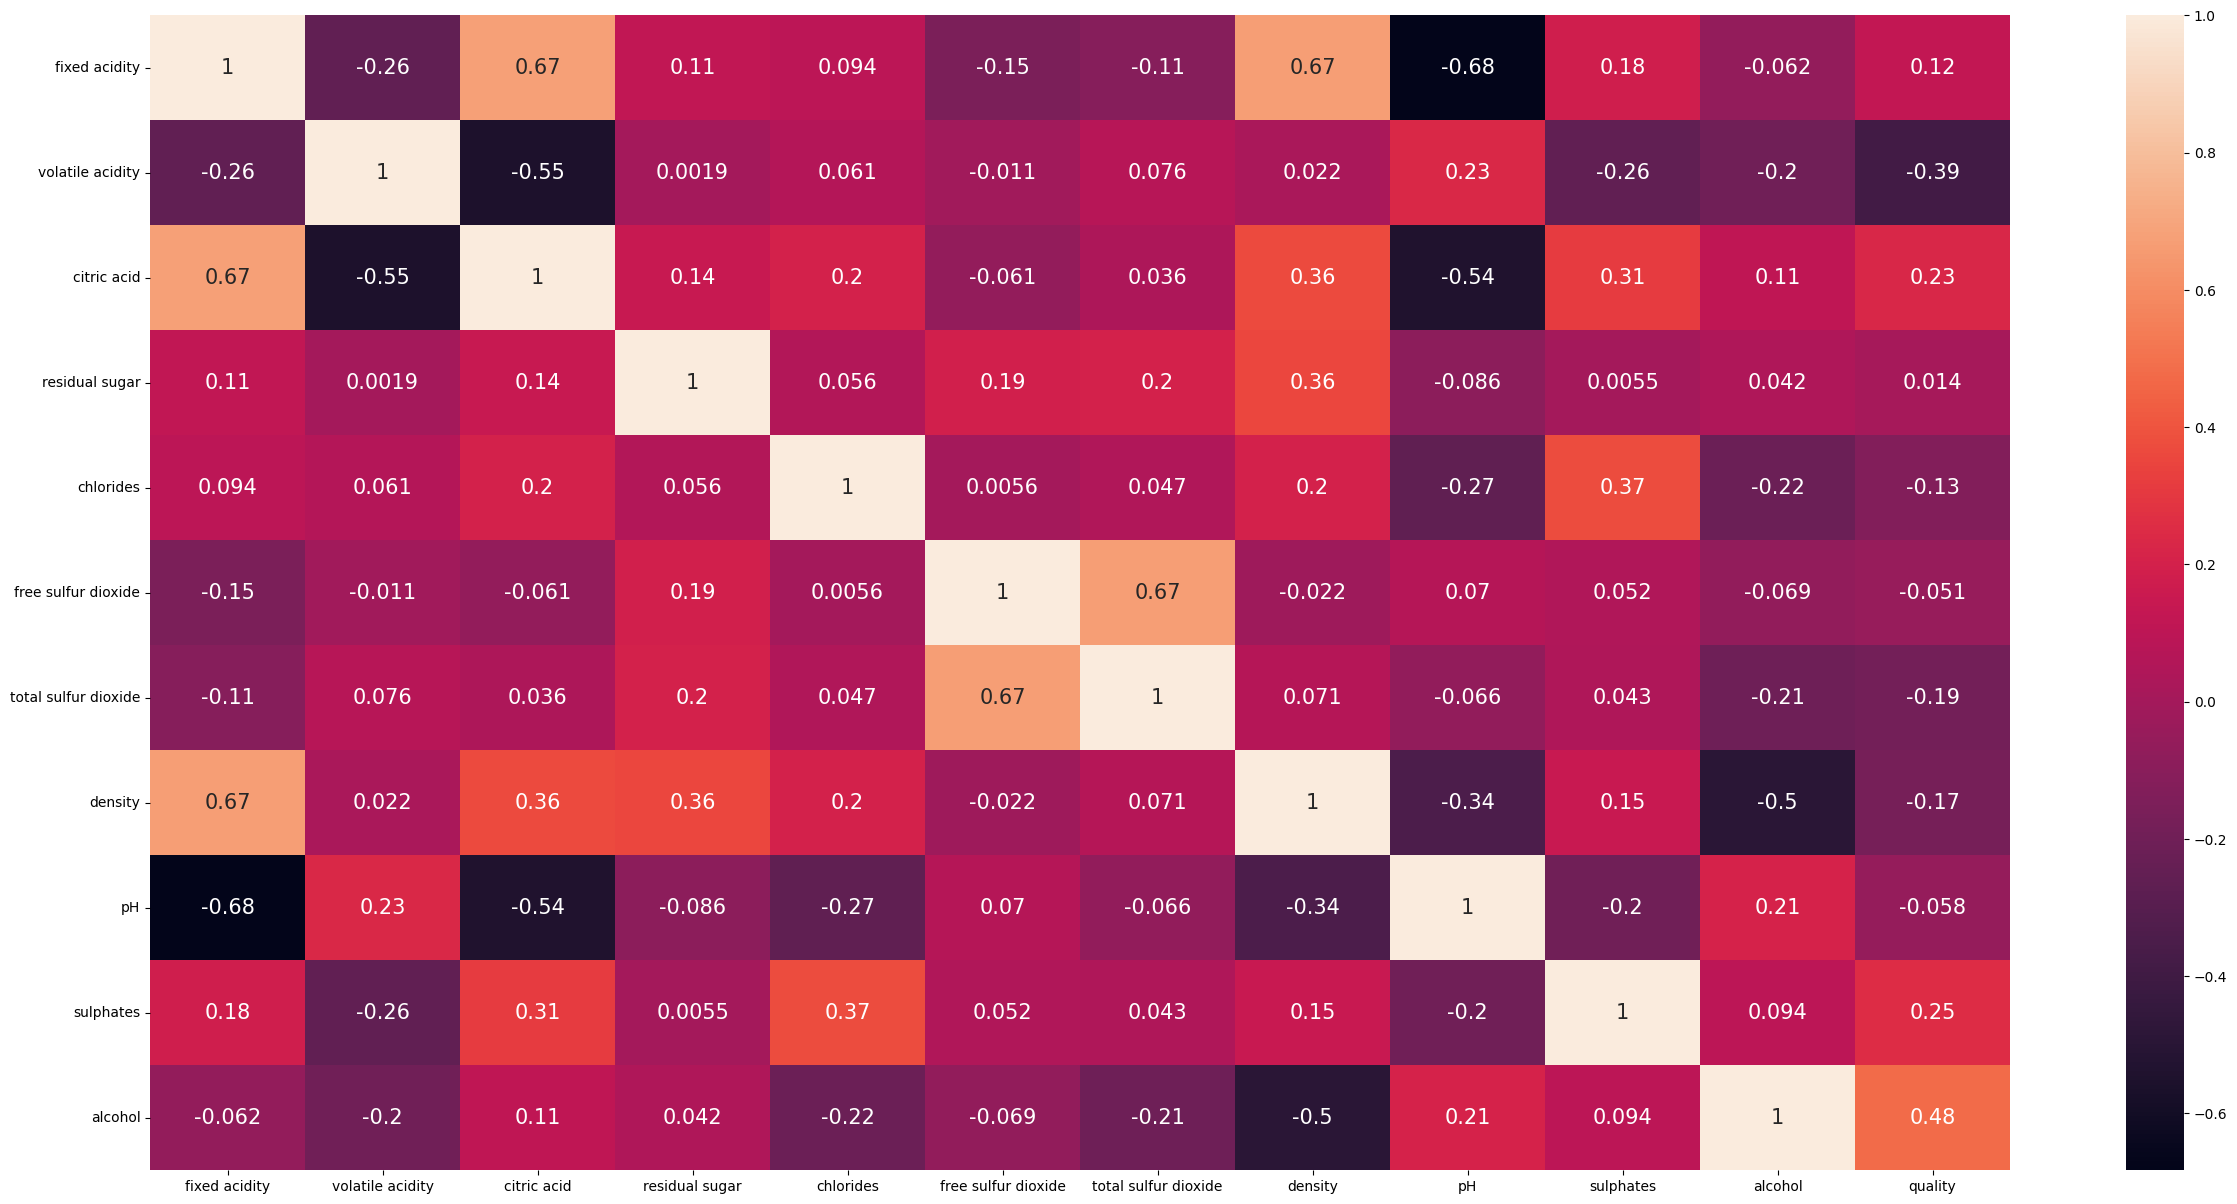

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('C:\\Users\\kmo82\\Desktop\\Study\\Document\\winequality-red.csv')
df_corr=df.corr() #상관관계 확인
df_corr=df_corr[:-1] #quality와 quality는 상관관계 제외


max=abs(df_corr['quality']).max() #절댓값으로 최대값 찾기
min=abs(df_corr['quality']).min() #절댓값으로 최소값 찾기
print(round(max+min, 2))
plt.figure(figsize=(30, 15)) 
sns.heatmap(df_corr, annot=True, annot_kws={'size':15}) #annot=True 색과 수치 함께 표시


# T1-17. 시계열 데이터1

In [8]:
#2022년 5월 sales의 중앙값을 구하시오
import pandas as pd
import numpy as np

df=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\basic2.csv")
df.head()
df['Date'] = pd.to_datetime(df['Date'])
ans=df[(df['Date'].dt.year==2022) & (df['Date'].dt.month==5)]['Sales'].median()
print(ans)



1477685.0


#  T1-18. 시계열 데이터2

In [25]:
#주어진 데이터에서 2022년 5월 주말과 평일의 sales컬럼 평균값 차이를 절대값으로 구하시오 (소수점 둘째자리까지 출력, 반올림)
import pandas as pd
import numpy as np

df=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\basic2.csv")

df['Date'] = pd.to_datetime(df['Date'])
df=df[(df['Date'].dt.year==2022) & (df['Date'].dt.month==5)]
df['weekday']=df['Date'].dt.weekday #0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일
weekend=df[(df['weekday']==5) | (df['weekday']==6)]
notweek=df[(df['weekday']!=5) & (df['weekday']!=6)]
week_mean=weekend['Sales'].mean()
not_mean=notweek['Sales'].mean()
ans=np.abs(round(week_mean-not_mean, 2))
print(ans)

3010339.1


# T1-25-str_slicing

In [37]:
#basic1 데이터에서 f4가 E로 시작하면서 부산에 살고 20대인 사람은 몇 명일까요?
df=pd.read_csv("C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\basic1.csv")
df=df[(df['f4'].str[0]=='E') & (df['city']=='부산') & (df['age']>=20) & (df['age']<30)]
#df[df['f4'].str.startswith("E")]
print(len(df))

0


# T1-26-str-contains

In [47]:
#menu컬럼에 "라떼" 키워드가 있는 데이터의 수는?
df=pd.read_csv('C:\\Users\\kmo82\\Desktop\\Study\\minjeong\\bigdatacertificationkr\\payment.csv')
df.head()
print(len(df[df['menu'].str.endswith('라떼')]))
#print(len(df[df['menu'].str[-2:]=='라떼']))

10
